## Basic features

Welcome (back) to my WordGame notebook-series! In this notebook we will discover frequently used words and *word pairs* in online word association games. We will compute the term frequency (tf), document frequency (df), inverse document frequency (idf), a combination of both (tf-idf) and the frequency of word pairs. We will use pandas dataframes and mathplotlib with seaborn for nice visualizations of all features. 

### The Wordgame dataset
The Wordgame dataset contains word associations (e.g. green -> grass) scraped from 10 online word association games. 
<a href="https://www.kaggle.com/anneloes/wordgame">Read more</a>

### Dataset statistics

First we do the usual library imports and stuff. 

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
import seaborn as sns # data visualization
#import pylab #pie?

from subprocess import check_output
#print(check_output(["ls", "../input/wordgame"]).decode("utf8"))

# color palette for nice plotting colors
pal = sns.color_palette("colorblind", n_colors=10)
#colors = ["pig pink", "fresh green", "olive", "light seafoam" , "green teal" , "spruce" , "cement", "dust", "petrol", "deep lilac"]
#pal = sns.xkcd_palette(colors)
#sns.palplot(sns.xkcd_palette(colors))
#sns.palplot(sns.hls_palette(10, l=.3, s=.8))

# set the color palette as default (does not always work?)
sns.palplot(pal)
# use a bigger fontsize in the plots by default  
sns.set(font_scale=1.5)

Now, let's open up the dataset.

In [6]:
#df = pd.read_csv('../input/wordgame/wordgame_20170628.csv', dtype='object')
df = pd.read_csv('../data/processed/wordgame_20170807.csv')
#df['forumID'] = df['forumID'].astype(int)
#print(df.dtypes)

# read the list with source names
with open('../data/processed/sources.csv') as f:
    sources_list = f.read().splitlines()
print(sources_list)

#print first 5 rows
df.head()

['AC', 'BC', 'CC', 'ECF', 'GOG', 'LEF', 'SAS', 'TF', 'U2', 'WP']


,user,forum,word,association,forumID
0,My smile is relief,U2,children,cute,8
1,Habanerose,GOG,journey,adventure,4
2,Judge,AC,listerine,antiseptic,0
3,Kleetus,GOG,whale,hello,4
4,le_chevalier,GOG,no,conspiracy,4


When we look at the third row we see data from the online community GOG, which is the sixth source in alphabetical order and therefore has sourceID 4. At some point in time, a user (who now has unique ID 1353) saw 'email' as the most recently posted word and reacted by posting 'spam', which appearently was his association when he read the word 'email'. More information about the data and the 5 variables can be found the the <a href="https://www.kaggle.com/anneloes/wordgame">dataset description</a>.

In [4]:
#print dataset dimensions
print("Dataset shape: " + str(df.shape))

#print number of sources
print("Number of sources: " + str(len(df['forumID'].unique())))

Dataset shape: (330395, 5)
Number of sources: 10


We also see that the dataset contains 334036 rows and indeed 10 sources 

### How many word pairs?
Now we know the number of rows and sources, we can expect that on average each source contains 33403 rows. However, we all know that there exist really large online communities and also very small communities. A seaborn barplot can be used to clearly visualize these differences. First, we will create a list in containing all source names in alphabetical order and then plot the information in this order. Setting the order is an optional step, it is to avoid possible confusion caused by different orderings in different plots. We will also use the color palette we defined earlier. 

### How many authors and ... ?

In [7]:
# sizes of sources
N10 = df.forum.value_counts().sort_index()

# (temporarily) drop duplicate users to obtain number of unique authors
a = df[['user','forum']].drop_duplicates()[:]
A10 = a.forum.value_counts().sort_index()

print("Number of unique users: " + str(len(a)))

#author frequentcy ppa
df['af'] = df.groupby(['user'])['user'].transform('count')

print("Number of unique users: " + str(len(df[['user','forum']].drop_duplicates()[:])))

Number of unique users: 6330
Number of unique users: 6330


Plot distribution of the number of posts per author

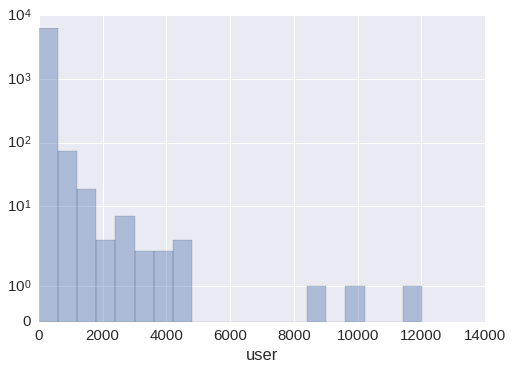

cmackenzie4     12018
jj2              9781
grimsby pete     8558
Hickory          4715
Owl-99           4650
Name: user, dtype: int64


count     6307.000000
mean        52.385445
std        309.866532
min          1.000000
25%          1.000000
50%          3.000000
75%         14.000000
max      12018.000000
Name: user, dtype: float64

In [19]:
#Plot
posts = df.user.value_counts()
g = sns.distplot(posts, bins=20, label=sources_list, kde=False)
plt.yscale('symlog')
plt.show()

print(posts.head())
df.user.value_counts().describe()

(how can bar1 be > 6000????)

Delete outliers in terms of posts.. 

In [44]:
#print(df.sort_values(by=['af'], ascending=False).drop_duplicates(subset=['user','forum']).head(3))

def samp(df):
    if len(df)>100:
        return df.sample(50)
    return df
    
df = df.groupby('user').apply(samp)

print(len(df2))
#df2 = df.sample(50).drop_duplicates(['user'])

print(df.user.value_counts().head())

#cm4 = df[(df['user']=='cmackenzie4')&(df['forum']=='TF')].head(2000)
#jj2 = df[(df['user']=='jj2')&(df['forum']=='ECF')].head(2000)
#gp = df[(df['user']=='grimsby_pete')&(df['forum']=='TF')].head(2000)

#df = pd.concat([df[df['af']<6000],cm4,jj2,gp]) #concatenate datasets
#df = df.sample(frac=1).reset_index(drop=True) # shuffle
#print(df.tail())

82008
rainbowOne     100
Jennacide       99
Arianus.836     99
fozzie          99
Jack            98
Name: user, dtype: int64


In [58]:
#Save
df = df.sample(frac=1).reset_index(drop=True) # shuffle
df.to_csv("../data/processed/wordgame_small.csv", sep=',', index=False)

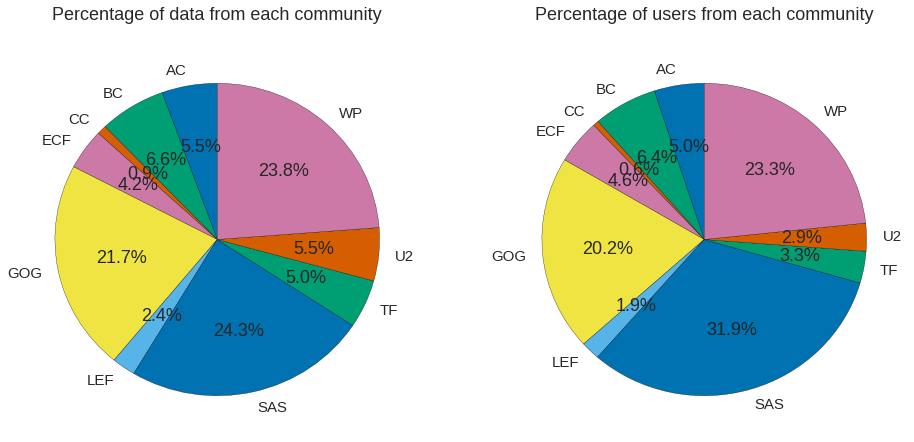

21.3888888889
16.0330578512


In [47]:
#againn...
# sizes of sources
N10 = df.forum.value_counts().sort_index()

# (temporarily) drop duplicate users to obtain number of unique authors
a = df[['user','forum']].drop_duplicates()[:]
A10 = a.forum.value_counts().sort_index()

# plot a pie chart of the source sizes
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.pie(N10.tolist(), colors=pal, labels=N10.index, autopct='%1.1f%%', startangle=90)
plt.title("Percentage of data from each community\n")

# plot a pie chart of the number of authors in each source 
plt.subplot(1,2,2)
plt.pie(A10.tolist(), colors=pal, labels=A10.index, autopct='%1.1f%%', startangle=90)
plt.title("Percentage of users from each community\n")
plt.show()

print(N10[2]/A10[2]) # CC 227 posts per user
print(N10[5]/A10[5]) # GOG 52.. average

Nice, both pies look similar!

In [48]:
# to list..
N10 = N10.tolist()

[...]

### Frequent words
Term frequency
[...]

In [49]:
# frequency/count of word1 in de dataset
df['tf'] = df.groupby(['word'])['word'].transform('count')

#remove words only occuring once
df = df[df['tf']>1]
# normalized term frequency
df['tf'] = df['tf']/len(df)

freq = df.word.value_counts().head(10)
tail = df.word.value_counts().tail(20)
print(freq)

water    202
music    136
money    133
time     131
food     130
green    125
love     118
death    116
fire     115
life     113
Name: word, dtype: int64


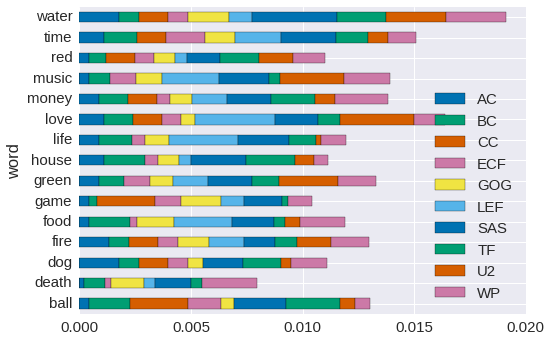

In [50]:
freq = df.drop_duplicates(subset=['word']).sort_values(by=['tf'], ascending=False).head(15)
freq_list = freq['word'].tolist()
sample = df[df['word'].isin(freq_list)].sort_values(by=['tf'], ascending=False)

# create crosstable
ct = pd.crosstab(sample.word, sample.forumID)
#ct = pd.DataFrame(ct)

# normalize value counts by number of words in source
for i in range(0,len(sources_list)):
    ct[i] = ct[i]/N10[i] 

ct.columns = sources_list
    
#Plot
ct.plot.barh(stacked=True, color=pal)
plt.show()

#### Comparing sources
[...]

In [51]:
def normTF10(r):
    return r.tf10/(N10[r.forumID])

#term frequency 
df['tf10'] = df.groupby(['word','forum'])['word'].transform('count')
# normalized term frequency
df['tf10'] = df.apply(normTF10, axis=1)

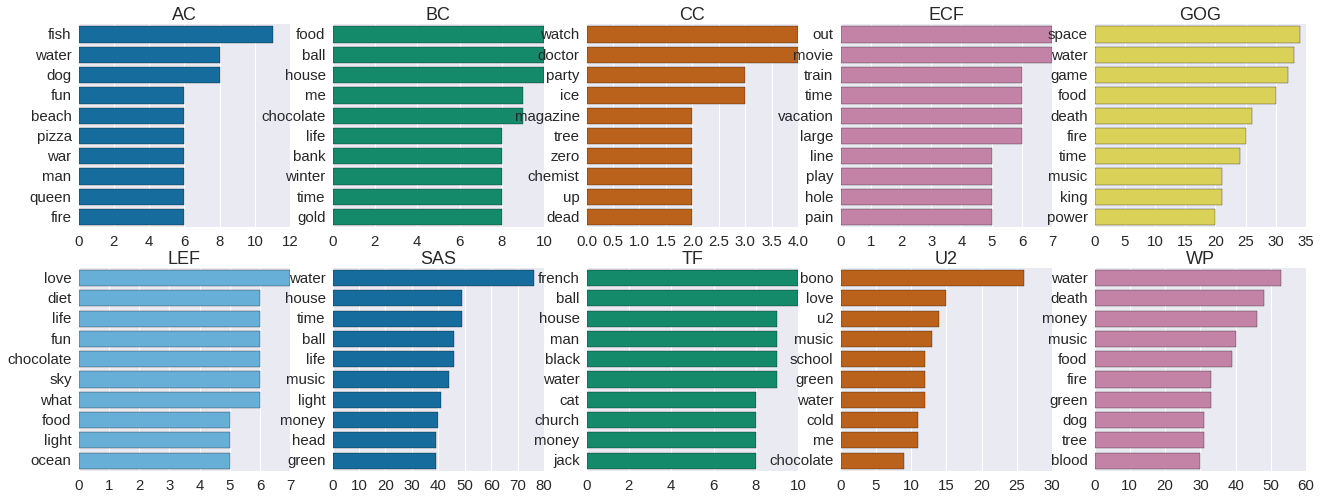

In [52]:
plt.figure(figsize=(22, 8))
for i in range(0,10):
    plt.subplot(2,5,i+1)
    freq = df[df['forumID']==i].word.value_counts().head(10)
    sns.barplot(freq.tolist(), freq.index, orient="h", color=pal[i])
    plt.title(sources_list[i])
    plt.xlabel('')
    plt.ylabel('')
plt.show()

Omg.. such small counts.. O_o (not really useful)

In [53]:
freq = df.drop_duplicates(subset=['word']).sort_values(by=['tf'], ascending=False).head(7)
freq_list = freq['word'].tolist()
print(freq_list)
#['water', 'music', 'time', 'money', 'fire', 'love', 'food']
test = df[df['word'].isin(freq_list)].drop_duplicates(subset=['word','forum']).sort_values(by=['tf'], ascending=False)

['water', 'music', 'money', 'time', 'food', 'green', 'love']


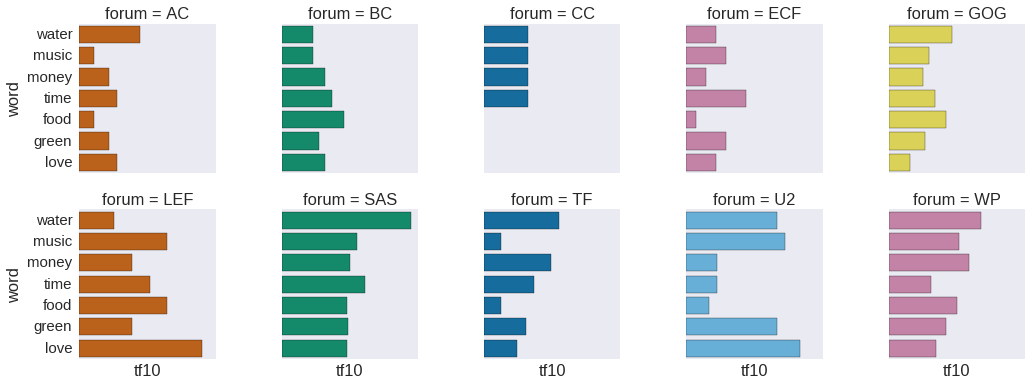

In [54]:
#plt.figure(figsize=(20,20))
g = sns.FacetGrid(test, col="forum", col_wrap=5, hue="forum", palette=pal, col_order=sources_list)#, size=6, aspect=0.5)  
g.map(sns.barplot, "tf10", "word", orient="h")#, color=pal[i])#, n_levels=5, shade=True, cmap=cmapi)
g.set(xticks=[])
plt.show()

(keep in mind that LEF is very small so the overal tf only slightly is affected. 

[...]

### Document frequency
[...]

In [ ]:
#create postings lists

#dummies! 

def getVoc(df):
    voc = []
    for i in range(0,len(sources_list)):
        voc.append((df['word'][df['forumID']==i]).unique().tolist())
    return voc

voc = getVoc(df)

In [68]:
def getDF(x):
    df = 0 
    for i in range(0,len(sources_list)):
            df += (x in voc[i])
    return df
                   
df['df'] = df['word'].apply(getDF)

KeyboardInterrupt: 

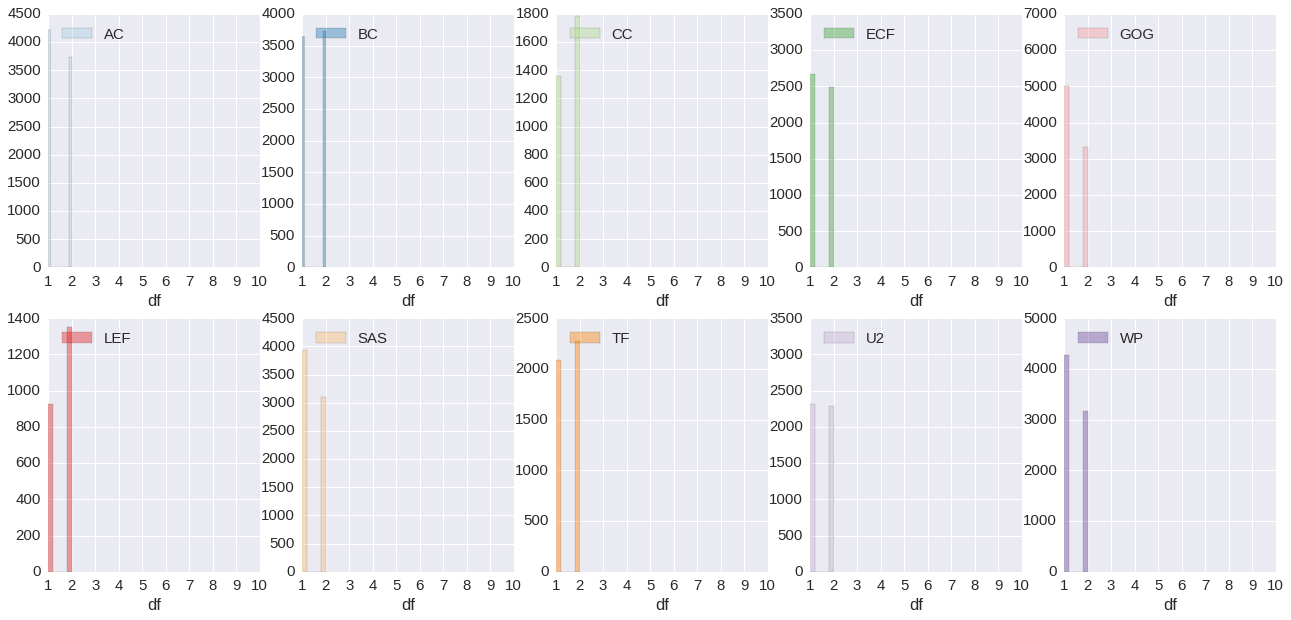

In [66]:
plt.figure(figsize=(22, 10))
for i in range(0,10):
    plt.subplot(2, 5, i+1)
    s = df[df['forumID']==i].drop_duplicates(subset=['word'])
    g = sns.distplot(s['df'], bins=10, label=sources_list[i], kde=False, color=pal[i])
    plt.legend(loc='upper left')
    axes = plt.gca()
    axes.set_xlim([1,10])
plt.show()

### Frequent word pairs 

In [ ]:
#concatenates word1 and word2 separated by a special character which does not appear in the words itself
def concat(r):
    return str(r.word1) + ":" + str(r.word2)

def normPF10(r):
    return r.pf10/(N10[r.sourceID])

df['pair'] = df.apply(concat, axis=1)

df['pf'] = df.groupby(['pair'])['pair'].transform('count')
df['pf10'] = df.groupby(['pair','source'])['pair'].transform('count')
# normalized pair frequency
df['pf10'] = df.apply(normPF10, axis=1)

#Plot
freq_pairs = df.sort_values(by=['pf'], ascending=False).drop_duplicates(subset=['pair']).head(15)

plt.figure(figsize=(22, 8))
sns.barplot("pf", "pair", data=freq_pairs, orient="h", color=pal[8])
plt.show()

#normalize
df['pf'] = df['pf']/len(df)

### TFIDF

In [ ]:
#standard idf smoothing
def tfidf10(r):
    return (r.tf10)*(np.log(1+(10/r.df)))

df['tfidf10'] = df.apply(tfidf10, axis=1)

In [ ]:
temp = df.sort_values(by=['tfidf10'], ascending=False)

plt.figure(figsize=(22, 10))
for i in range(0,10):
    plt.subplot(2,5,i+1)
    frq_wrds = temp[temp['sourceID']==i].drop_duplicates(subset=['word1']).head(10)
    frq_df = pd.DataFrame()
    frq_df['word'] = frq_wrds.word1
    frq_df['count'] = frq_wrds.tfidf10
    g = sns.barplot("count", "word", data=frq_df, orient="h", color=pal[i])
    g.set(xticks=[0.001])
    plt.title(sources_list[i])    
    plt.xlabel('')
    plt.ylabel('')
plt.show()

..

### PFIDF



In [ ]:
def pfidf10(r):
    return (r.pf10)*(np.log(1+(10/r.df)))

df['pfidf10'] = df.apply(pfidf10, axis=1)

### Save output

In [ ]:
# write rows to file
df.to_csv("../data/processed/wordgame_20170721_freq.csv", sep=',', index=False)
df.head()

I will update the missing text soon. Thanks for visiting my wordgame project, feel free to leave comments. :)